In [228]:
# handling data
import numpy as np
import pandas as pd

# plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

# handling telomere length data
import fukushima_telomere_methods as f_tm

# for loading telo data column containing individual
# telomere length values, enables literal reading of a list as numbers
from ast import literal_eval

# incase module requires reloading
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
&nbsp; 

...

&nbsp; 

---

In [229]:
# setting all graphs to have darkgrid style w/ black edges for axes elements
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

# Mean Telomere Length and Dose
---

In [230]:
# Loading New Dose Quantifications (+age/sex data), Cortisol, Telomere FISH, and Dicentric Data

In [267]:
trim_kelly_new_exposure_df = pd.read_csv('../excel data/cleaned/trim_kelly_new_exposure_df.csv')
prep_boar_cortisol_df = pd.read_csv('../excel data/cleaned/prep_boar_cortisol_df.csv')
kelly_boar_teloFISH_df = pd.read_csv('../excel data/cleaned/kelly_boar_teloFISH_df.csv')
kelly_boar_dicentrics_df = pd.read_csv('../excel data/cleaned/kelly_boar_dicentrics_df.csv')

## Merging Kelly's Telomere FISH data w/ New Dose Quantifications (+age/sex data)

In [232]:
merge_kelly_teloFISH_exposure = kelly_boar_teloFISH_df.merge(trim_kelly_new_exposure_df, on=['Sample ID'])

# making new df for handling feature engineering of individual telo measurements, i.e counts of short/long telos 
place_hold_merge_kelly_teloFISH_exposure_telo_counts = merge_kelly_teloFISH_exposure.copy()

In [233]:
merge_kelly_teloFISH_exposure.drop([34], axis=0, inplace=True)
merge_kelly_teloFISH_exposure.head(4)

,Sample ID,teloFISH data,teloFISH means,Sex,Age (weeks),INTERNAL uGy/h Cs-134,INTERNAL uGy/h Cs-137,"INTERNAL Life time dose, mGy 134",Integrated INTERNAL LIFE-TIME dose mGy Cs134,"INTERNAL Life time dose, mGy 137","INTERNAL Life time dose, mGy Cs 134+137","EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137",% of INTERNAL to EXTERNAL dose,"EXTERNAL Dose Maximum Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)","Maximum Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)
0,1606103,"[0.9942074384031242, 0.33512610283251376, 0.16...",0.439557,Male,27-31,0.15108850000000001,0.494718,0.7361031720000001,0.808553,2.410267,3.218820,68.2080,4.719123130717804,92.5680,71.426820,95.786820,3.645807
1,1607205,"[0.26251544721880243, 0.33512610283251376, 0.3...",0.452469,Male,6-9,0.009512514,0.028632,0.011985767639999999,0.012258,0.036077,0.048335,0.8820,5.480146683673469,1.2600,0.930335,1.308335,0.738145
2,1607221,"[0.7707900365147816, 0.357467843021348, 0.2681...",0.533217,Male,6-9,0.6282408,2.033350,0.791583408,0.810176,2.562021,3.372197,17.6400,19.11676530612245,23.9400,21.012197,27.312197,5.661591
3,1607231,"[1.379602456660515, 0.5306163294848134, 0.8769...",0.583101,Female,21,0.42985015000000004,1.384762,1.5165113292,1.620353,4.885442,6.505795,9.8784,65.858791909621,13.4064,16.384195,19.912195,2.614613


In [234]:
merge_kelly_teloFISH_exposure['Age (weeks)'] = merge_kelly_teloFISH_exposure['Age (weeks)'].apply(lambda row: f_tm.average_age_weeks(row))
merge_kelly_teloFISH_exposure['Age (weeks)'] = merge_kelly_teloFISH_exposure['Age (weeks)'].astype('int64')

In [235]:
## Checking shapes of loaded data...
print(
'','Data: Shape\n',
'kelly_boar_teloFISH_df',kelly_boar_teloFISH_df.shape,'\n',
'trim_kelly_new_exposure_df',trim_kelly_new_exposure_df.shape,'\n',
'prep_boar_cortisol_df',prep_boar_cortisol_df.shape,'\n',
'merge_kelly_teloFISH_exposure',merge_kelly_teloFISH_exposure.shape,'\n',)

 Data: Shape
 kelly_boar_teloFISH_df (41, 3) 
 trim_kelly_new_exposure_df (41, 15) 
 prep_boar_cortisol_df (48, 3) 
 merge_kelly_teloFISH_exposure (37, 17) 



## Removing missing values from the exposure data

In [236]:
merge_kelly_teloFISH_exposure.replace('none', np.NaN, inplace=True)
merge_kelly_teloFISH_exposure.dropna(axis=0, inplace=True)
merge_kelly_teloFISH_exposure.columns

Index(['Sample ID', 'teloFISH data', 'teloFISH means', 'Sex', 'Age (weeks)',
       'INTERNAL uGy/h Cs-134', 'INTERNAL uGy/h Cs-137',
       'INTERNAL Life time dose, mGy 134',
       'Integrated INTERNAL LIFE-TIME dose mGy  Cs134',
       'INTERNAL Life time dose, mGy 137',
       'INTERNAL Life time dose, mGy Cs 134+137',
       'EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137',
       '% of INTERNAL to EXTERNAL dose',
       'EXTERNAL Dose Maximum Life Time, mGy (134+137)',
       'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)',
       'Maximum Total Life Time Dose mGy (Int+Ext,134+137)',
       'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)'],
      dtype='object')

We have a wide variety of radiation dose estimates to explore.

In [237]:
cols_graph = [
       'INTERNAL uGy/h Cs-134', 'INTERNAL uGy/h Cs-137',
       'INTERNAL Life time dose,   mGy 134',
       'Integrated INTERNAL LIFE-TIME dose mGy  Cs134',
       'INTERNAL Life time dose, mGy 137',
       'INTERNAL Life time dose, mGy Cs 134+137',
       'EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137',
       '% of INTERNAL to EXTERNAL dose',
       'EXTERNAL Dose Maximum Life Time, mGy (134+137)',
       'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)',
       'Maximum Total Life Time Dose mGy (Int+Ext,134+137)',
       'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)']


cols_graph_3 = [
'INTERNAL Life time dose, mGy Cs 134+137',
'EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137',
'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)',]

In [238]:
for column in cols_graph_3:
    merge_kelly_teloFISH_exposure[column] = merge_kelly_teloFISH_exposure[column].astype('float')
merge_kelly_teloFISH_exposure['Age (weeks)'] = merge_kelly_teloFISH_exposure['Age (weeks)'].astype('int')

## Saving kelly teloFISH cortisol dataframe

In [239]:
merge_kelly_teloFISH_exposure.to_csv("../excel data/graphing/merge_kelly_teloFISH_exposure.csv", index=False)
merge_kelly_teloFISH_exposure['Age (weeks)'].dtype

dtype('int64')

## Visualizing Mean Telomere Length vs. Dose

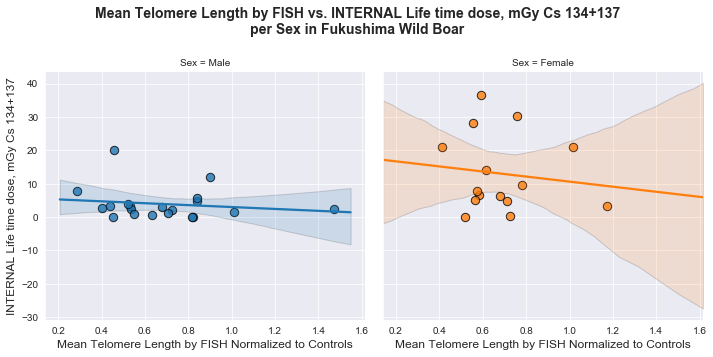

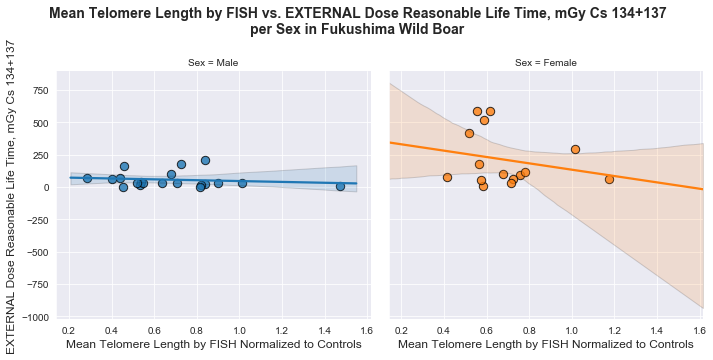

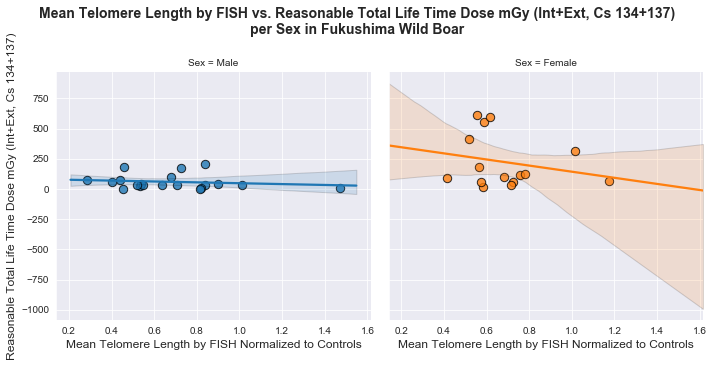

In [240]:
for y_title in cols_graph_3:
    
    if "/" in y_title:
        name_current = y_title.replace("/",'')
    else:
        name_current = y_title

    ax=sns.lmplot(x='teloFISH means', y=y_title, hue='Sex', col='Sex', data=merge_kelly_teloFISH_exposure,
    height=5, aspect=1, scatter_kws={
                        "s": 70,
#                         "s": merge_kelly_teloFISH_exposure['Age (weeks)'], 
                        "edgecolor":'black'},
    legend=True, legend_out=True)
    
    fig = ax.fig 
    
    fig.suptitle(f'Mean Telomere Length by FISH vs. {y_title}\nper Sex in Fukushima Wild Boar', fontsize=14, weight='bold')
    ax.set_xlabels('Mean Telomere Length by FISH Normalized to Controls', fontsize=12)
    ax.set_ylabels(y_title, fontsize=12)
    plt.subplots_adjust(top=0.80)
    
#     fig.legend(fontsize='large')
#     ax.savefig(f"../graphs/Mean Telomere Length by FISH vs {name_current}.png")

# % Short & Long Individual Telomeres & Dose

In [241]:
# making new df for handling feature engineering of individual telo measurements, i.e counts of short/long telos 
merge_kelly_teloFISH_exposure_telo_counts = place_hold_merge_kelly_teloFISH_exposure_telo_counts

In [242]:
merge_kelly_teloFISH_exposure_telo_counts['teloFISH data'] = merge_kelly_teloFISH_exposure_telo_counts['teloFISH data'].apply(lambda row: literal_eval(row))

### Making dataframe containing all individual boar telomere length measurements

In [243]:
# making df consisting only of individual telomere length measurements
total_boar_telos_df = merge_kelly_teloFISH_exposure_telo_counts['teloFISH data'].apply(pd.Series)
print(total_boar_telos_df.shape)

(38, 4800)


In [244]:
# reshaping df so that all individual telo measurements are in one column
total_boar_telos_vector_df = pd.DataFrame(total_boar_telos_df.values.reshape(-1,1))
print(total_boar_telos_vector_df.shape)

(182400, 1)


Counting # of individual telomeres PER boar that fall below the 0.25th quartile, within the 0.25-0.75 range, & above 0.75 quartile established by the population of individual telomeres from ALL boar.

This allows us to describe the individual telomere length distribution per boar relative to the population of all individual telomere length measurements.

In [245]:
# making columns to hold the count data
for col in ['Q1', 'Q2-3', 'Q4']:
    merge_kelly_teloFISH_exposure_telo_counts[col] = 'fill'
    
# feature engineering counts of # individual telos per boar that fall below the 0.25, within the 0.25-0.75 range, & above 0.75 quantile 
merge_kelly_teloFISH_exposure_telo_counts = f_tm.make_quartiles_columns(total_boar_telos_vector_df, merge_kelly_teloFISH_exposure_telo_counts)

# ensuring int type of data
for col in ['Q1', 'Q2-3', 'Q4']:
    merge_kelly_teloFISH_exposure_telo_counts[col] = merge_kelly_teloFISH_exposure_telo_counts[col].astype('int')

# feature engineering % short, medium long telos from the quartile 
# (% type) = (# counts / 4800 total telos per sample) * 100
telo_types = ['% short telomeres', '% medium telomeres', '% long telomeres']
quartiles = ['Q1', 'Q2-3', 'Q4']

for t_type, quart in zip(telo_types, quartiles):
    merge_kelly_teloFISH_exposure_telo_counts[t_type] = (merge_kelly_teloFISH_exposure_telo_counts[quart] / 4800) * 100
    
for t_type in telo_types:
    merge_kelly_teloFISH_exposure_telo_counts[t_type] = merge_kelly_teloFISH_exposure_telo_counts[t_type].astype('int')

In [246]:
merge_kelly_teloFISH_exposure_telo_counts.drop(index=34, inplace=True)

In [247]:
merge_kelly_teloFISH_exposure_telo_counts['Age (weeks)'] = (merge_kelly_teloFISH_exposure_telo_counts['Age (weeks)']
                                                            .apply(lambda x: f_tm.average_age_weeks(x)))

merge_kelly_teloFISH_exposure_telo_counts.replace('none', np.NaN, inplace=True)
merge_kelly_teloFISH_exposure_telo_counts.dropna(axis=0, inplace=True)

for column in cols_graph_3:
    merge_kelly_teloFISH_exposure_telo_counts[column] = merge_kelly_teloFISH_exposure_telo_counts[column].astype('float')
    
merge_kelly_teloFISH_exposure_telo_counts['Age (weeks)'] = merge_kelly_teloFISH_exposure_telo_counts['Age (weeks)'].astype('int')

In [248]:
print(merge_kelly_teloFISH_exposure_telo_counts.shape,
     merge_kelly_teloFISH_exposure.shape)

(35, 23) (35, 17)


## Visualizing % long / short telomeres and dose

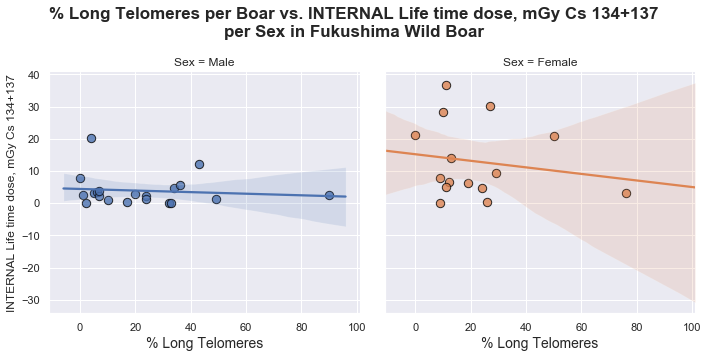

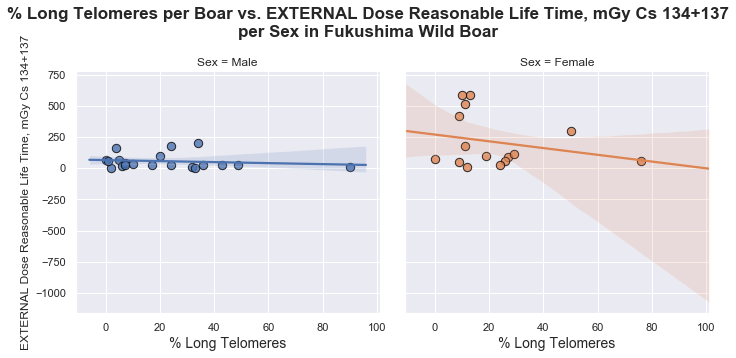

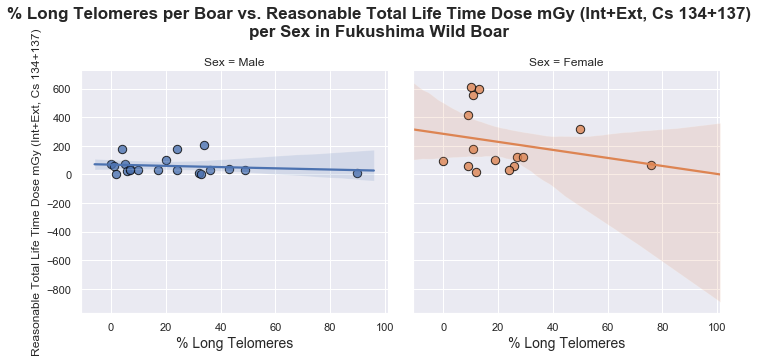

In [280]:
for y_title in cols_graph_3:
    
    if "/" in y_title:
        name_current = y_title.replace("/",'')
    else:
        name_current = y_title

    ax=sns.lmplot(x='% long telomeres', y=y_title, hue='Sex', col='Sex', data=merge_kelly_teloFISH_exposure_telo_counts,
    height=5, aspect=1, 
                  scatter_kws={
                      "s": 70, 
                      "edgecolor":'black'})

    fig = ax.fig 

    fig.suptitle(f'% Long Telomeres per Boar vs. {y_title}\nper Sex in Fukushima Wild Boar', fontsize=17, weight='bold')
    ax.set_xlabels('% Long Telomeres', fontsize=14)
    ax.set_ylabels(y_title, fontsize=12)
    plt.subplots_adjust(top=0.8)
    
    ax.savefig(f"../graphs/short and long telos vs {name_current}.png")

There are more samples shared between the cortisol & exposure dataframes (18) than between the teloFISH cortisol & exposure dataframes (14).. hence we'll use the former to compare cortisol to exposure

# Cortisol and Dose
---

In [281]:
merge_kelly_teloFISH_cortisol_exposure = merge_kelly_teloFISH_exposure.merge(prep_boar_cortisol_df, on=['Sample ID'])
print('boar w/ teloFISH cortisol, exposure data', merge_kelly_teloFISH_cortisol_exposure.shape)

merge_kelly_cortisol_exposure = trim_kelly_new_exposure_df.merge(prep_boar_cortisol_df, on=['Sample ID'])
print('boar w/ cortisol, exposure data', merge_kelly_cortisol_exposure.shape)

merge_kelly_cortisol_exposure['Age (weeks)'] = merge_kelly_cortisol_exposure['Age (weeks)'].apply(lambda row: f_tm.average_age_weeks(row))
merge_kelly_cortisol_exposure['Age (weeks)'] = merge_kelly_cortisol_exposure['Age (weeks)'].astype('int')

merge_kelly_cortisol_exposure.to_csv('../excel data/graphing/merge_kelly_cortisol_exposure.csv', index=False)

boar w/ teloFISH cortisol, exposure data (14, 19)
boar w/ cortisol, exposure data (18, 17)


In [282]:
merge_kelly_cortisol_exposure.drop(6, axis=0, inplace=True)

In [283]:
# columns we'll graph telomere length by teloFISH against 
y_cols_to_graph = [
'INTERNAL Life time dose, mGy Cs 134+137',
'EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137',
'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)']

In [287]:
def multiple_linear_regression_graphs_between_variables(x=None, y_cols_to_graph=None,
                                                        data=None, hue=None, col=None,
                                                       hue_order=None, col_order=None):

    for y in y_cols_to_graph:

        ax=sns.lmplot(x=x, y=y, hue=hue, col=col, data=data,
        height=5, aspect=1, scatter_kws={"s": 70, "edgecolor":'black'},
        hue_order=hue_order, col_order=col_order)

        fig = ax.fig 
        fig.suptitle(f'{x} vs. {y}\nper Sex in Fukushima Wild Boar', fontsize=14, weight='bold')
        ax.set_xlabels(x, fontsize=12)
        ax.set_ylabels(y, fontsize=12)
        plt.subplots_adjust(top=0.84)
        fig.legend(fontsize='medium')
    #     ax.savefig(f"../graphs/Mean Telomere Length by FISH vs {name_current}.png")

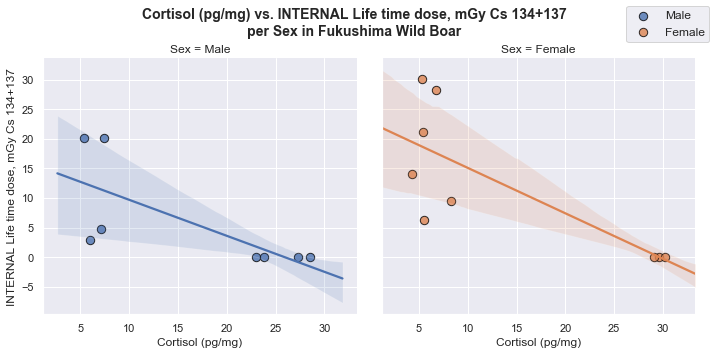

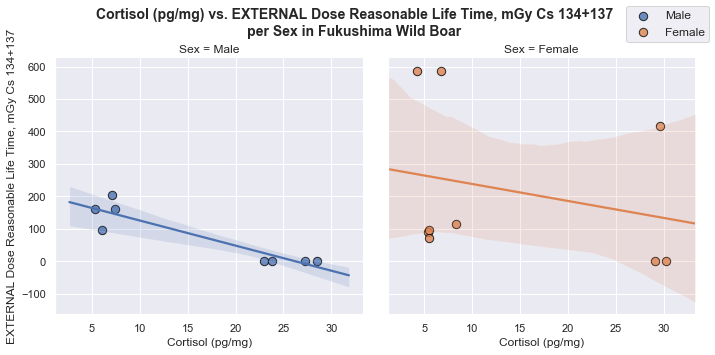

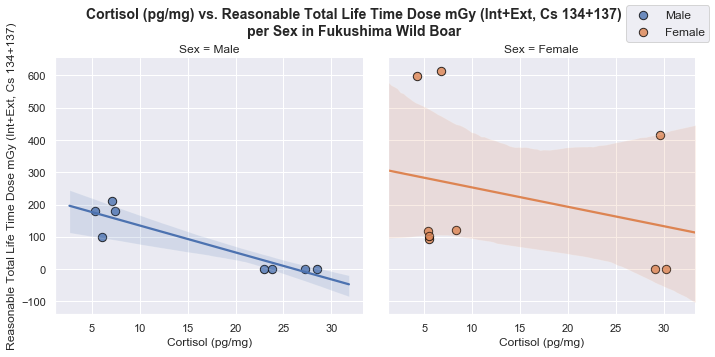

In [288]:
x='Cortisol (pg/mg)'
data = merge_kelly_cortisol_exposure
hue='Sex'
col='Sex'

multiple_linear_regression_graphs_between_variables(x=x, y_cols_to_graph=y_cols_to_graph,
                                                    data=data, hue=hue, col=col,
                                                   hue_order=['Male', 'Female',],
                                                   col_order=['Male', 'Female',])

# Aryn Data (telomere length qPCR)

In [297]:
aryn_boar_df = pd.read_csv('../excel data/cleaned/aryn_boar_df.csv')

aryn_snake_df = pd.read_csv('../excel data/cleaned/aryn_snake_df.csv')

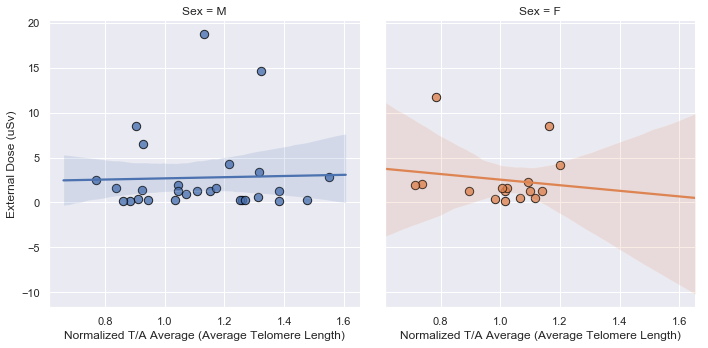

In [301]:
sns.lmplot(x='Normalized T/A Average (Average Telomere Length)', y='External Dose (uSv)', 
           hue='Sex', col='Sex', 
           scatter_kws={
               "s": 70,
               "edgecolor":"black"
           },
           data=aryn_boar_df)

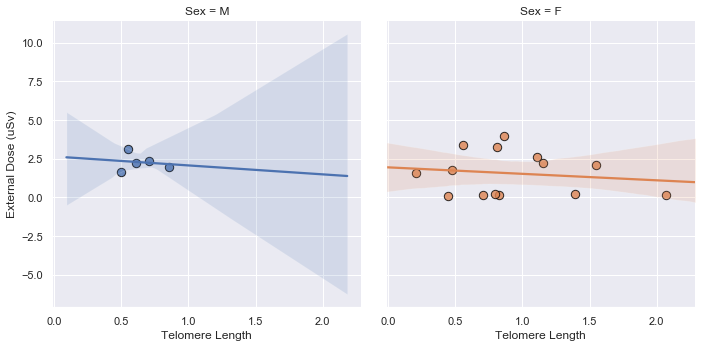

In [313]:
sns.lmplot(x='Telomere Length', y='External Dose (uSv)', 
           hue_order=['M', 'F'],
           col_order=['M', 'F'],
           col='Sex', 
           hue='Sex', 
           scatter_kws={
               "s":70,
               "edgecolor":"black"},
               data=aryn_snake_df)

# Josh Data (PPHA)

In [329]:
josh_ppha_df_cortisol = pd.read_csv('../excel data/cleaned/josh_ppha_df_cortisol.csv')
merge_josh_ppha_df = pd.read_csv('../excel data/cleaned/merge_josh_ppha_df.csv')
merge_josh_age_sex_ppha_df = pd.read_csv('../excel data/cleaned/merge_josh_age_sex_ppha_df.csv')

In [344]:
merge_josh_age_sex_ppha_df.head(4)

,Sample ID,Age (weeks),PPHAs,Normal Neutrophils,Total cells counted,Gy,%PPHA,Sex
0,Ba20170605,49,3,1507.0,1510.0,0.2630,0.198675,M
1,Ba20170609,220,13,526.0,539.0,2.4030,2.411874,F
2,Bb20170609,49,5,545.0,550.0,0.1460,0.909091,M
3,Ba20170615,220,4,537.0,541.0,0.4377,0.739372,F


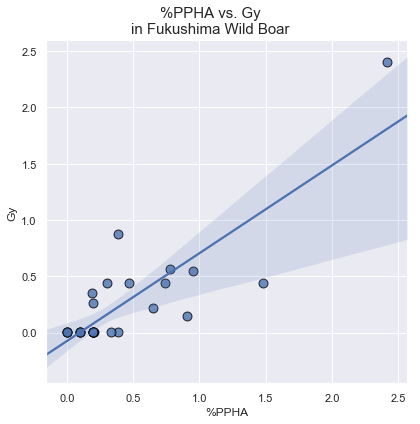

In [331]:
x='%PPHA'
y='Gy'
data=merge_josh_ppha_df
hue=None
col=None

ax = sns.set(font_scale=1)
ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=data, 
                height=6, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 
fig.suptitle(f'{x} vs. {y}\nin Fukushima Wild Boar', fontsize=15,)
plt.subplots_adjust(top=0.9)

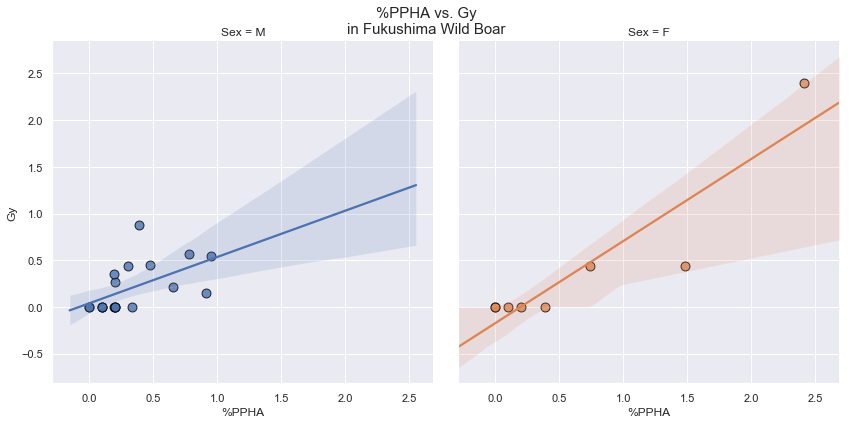

In [333]:
x='%PPHA'
y='Gy'
data=merge_josh_age_sex_ppha_df
hue='Sex'
col='Sex'

ax = sns.set(font_scale=1)
ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=data, 
                height=6, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 
fig.suptitle(f'{x} vs. {y}\nin Fukushima Wild Boar', fontsize=15,)
plt.subplots_adjust(top=0.9)

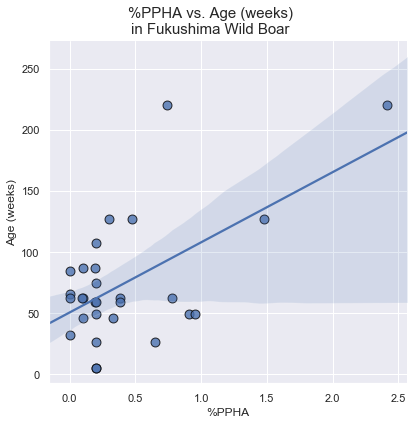

In [335]:
x='%PPHA'
y='Age (weeks)'
data=merge_josh_ppha_df
hue=None
col=None

ax = sns.set(font_scale=1)
ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=data, 
                height=6, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 
fig.suptitle(f'{x} vs. {y}\nin Fukushima Wild Boar', fontsize=15,)
plt.subplots_adjust(top=0.9)

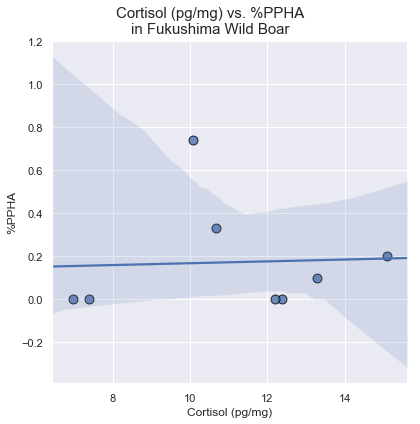

In [316]:
x='Cortisol (pg/mg)'
y='%PPHA'
data=josh_ppha_df_cortisol
hue=None
col=None

ax = sns.set(font_scale=1)
ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=data, 
                height=6, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 
fig.suptitle(f'{x} vs. {y}\nin Fukushima Wild Boar', fontsize=15,)
plt.subplots_adjust(top=0.9)

In [347]:
kelly_dicentrics = pd.read_csv('../excel data/cleaned/kelly_boar_dicentrics_df.csv')

merge_test = merge_kelly_teloFISH_exposure.merge(kelly_dicentrics, on=['Sample ID'])
merge_test.head(1)

,Sample ID,teloFISH data,teloFISH means,Sex,Age (weeks),INTERNAL uGy/h Cs-134,INTERNAL uGy/h Cs-137,"INTERNAL Life time dose, mGy 134",Integrated INTERNAL LIFE-TIME dose mGy Cs134,"INTERNAL Life time dose, mGy 137","INTERNAL Life time dose, mGy Cs 134+137","EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137",% of INTERNAL to EXTERNAL dose,"EXTERNAL Dose Maximum Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)","Maximum Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137),Average Dicentrics per cell
0,1606103,"[0.9942074384031242, 0.33512610283251376, 0.16...",0.439557,Male,29,0.15108850000000001,0.494718,0.7361031720000001,0.808553,2.410267,3.21882,68.208,4.719123130717804,92.568,71.42682,95.78682,3.645807,0.0


No handles with labels found to put in legend.


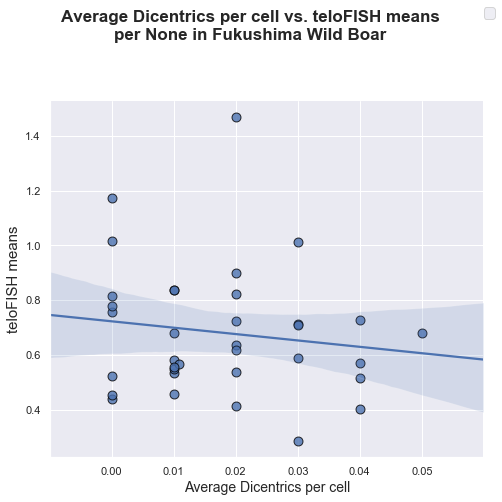

In [349]:
x='Average Dicentrics per cell'
y='teloFISH means'
hue=None
col=None

if "/" in name_x:
        name_x = x.replace("/", '')
else:
    name_x = x
        
if "/" in name_y:
        name_y = y.replace("/", '')
else:
    name_y = y

ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=merge_test, height=7, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 

fig.suptitle(f'{x} vs. {y}\nper {hue} in Fukushima Wild Boar', fontsize=17, weight='bold')
ax.set_xlabels(x, fontsize=14)
ax.set_ylabels(y, fontsize=15)
plt.subplots_adjust(top=0.8)
# fig.legend(fontsize='large')
ax.savefig(f"../graphs/{name_x} vs. {name_y} Fukushima Wild Boar.png")

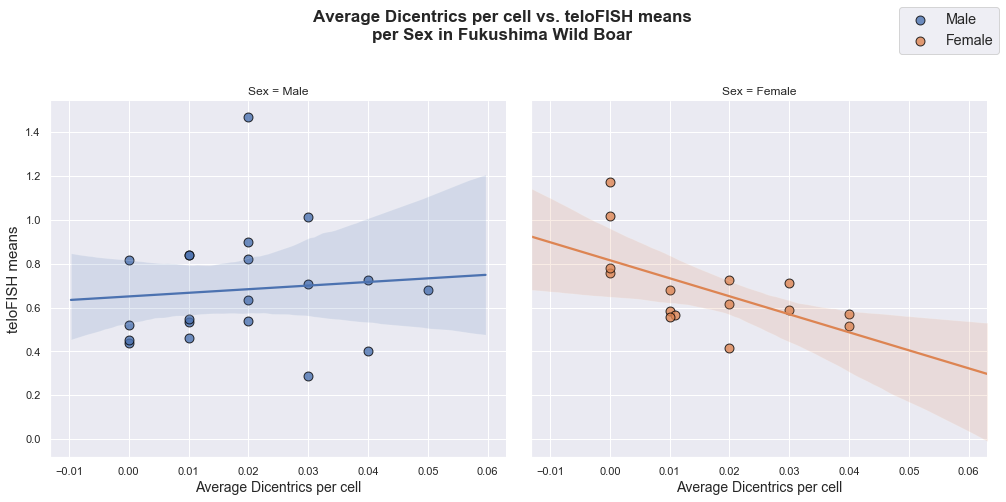

In [350]:
x='Average Dicentrics per cell'
y='teloFISH means'
hue='Sex'
col='Sex'

if "/" in name_x:
        name_x = x.replace("/", '')
else:
    name_x = x
        
if "/" in name_y:
        name_y = y.replace("/", '')
else:
    name_y = y

ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=merge_test, height=7, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 

fig.suptitle(f'{x} vs. {y}\nper {hue} in Fukushima Wild Boar', fontsize=17, weight='bold')
ax.set_xlabels(x, fontsize=14)
ax.set_ylabels(y, fontsize=15)
plt.subplots_adjust(top=0.8)
fig.legend(fontsize='large')
ax.savefig(f"../graphs/{name_x} vs. {name_y} Fukushima Wild Boar.png")